In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Uncomment this if you are using Google Colab
#!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/BiasVarianceDemo/data.csv
#!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/BiasVarianceDemo/helper.py

### Data loading

In [2]:
df = pd.read_csv('./data.csv')
print(df.shape)
df.head()

(500, 4)


,area,crime_rate,metro_proximity,price
0,127,4.353254,3609.371479,236
1,117,1.679765,2221.716693,230
2,39,8.455495,1565.989757,94
3,131,2.014797,3405.380227,232
4,96,3.707401,1227.551028,219


### Data analysis
Usually we start an ML project with data analysis. In this notebook we assume that the price of the appartment depends only on the area of it, so let's check the relation visually

<AxesSubplot:xlabel='area', ylabel='price'>

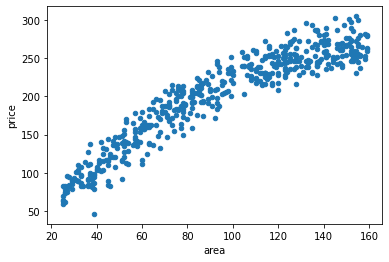

In [3]:
df.plot.scatter('area', 'price')

### Data preparation
We want to create the model that estimates the price of the apartment given the area of it. It may be denoted as:
$$price = f(area)$$
or 
$$y = f(X)$$
To train the model we need to prepare our features ($X$) and labels ($y$)

In [4]:
X = df[['area']]
y = df['price']

print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (500, 1)
Y shape: (500,)


### Model creation and training
Let's start with the simplest model possible.
**Question: Is this a classification or a regression task?**


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression()

### Let's see how the model works

In [8]:
model.predict([[50]])

g:\Anaconda\envs\bigData\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([135.55180444])

In [10]:
def get_price(model, area):
    price = model.predict([[area]])
    print('Price for {}m^2 appartment is: {:.2f} thus. USD.'.format(area, price[0]))

get_price(model, 50)
get_price(model, 100)
get_price(model, 150)

Price for 50m^2 appartment is: 135.55 thus. USD.
Price for 100m^2 appartment is: 207.84 thus. USD.
Price for 150m^2 appartment is: 280.13 thus. USD.


g:\Anaconda\envs\bigData\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
g:\Anaconda\envs\bigData\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
g:\Anaconda\envs\bigData\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


g:\Anaconda\envs\bigData\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


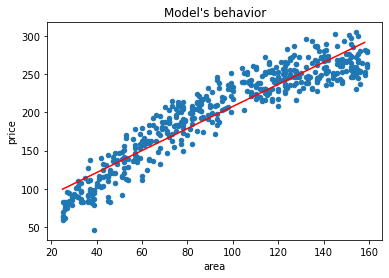

In [11]:
import helper
helper.plot_model(model, df)

### How good is the model
To estimate the quality of the model we can use Mean Average Percentage Error (MAPE)
$$MAPE = 100\% * \frac{1}{n} \sum_{i=1}^n\displaystyle\left\lvert \frac{ypred_i-y_i}{y_i}\right\rvert$$

Where:
- $y$ - real price
- $ypred$ - estimated price (model's output)
- $n$ - number of examples

In [16]:
def print_mape(model, X, y):
    ypred = model.predict(X)
    error = 100*np.mean(np.abs((ypred - y) / y))
    print("MAPE error: {0:.1f}%".format(error))

print_mape(model, X, y)

MAPE error: 10.8%


### More complicated model
Linear regression is a relatively simple model that produces only a line. Let's try something more complicated.

In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(min_samples_leaf=25)
model.fit(X, y)
print_mape(model, X, y)

MAPE error: 7.8%


g:\Anaconda\envs\bigData\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


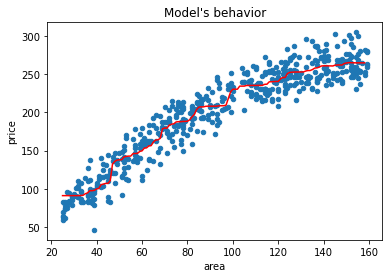

In [19]:
helper.plot_model(model, df)

## More inputs
To increase the accuracy, we may also consider other features, such as crime rate or proximity to the metro

In [20]:
X = df.drop('price', axis = 1)
X.sort_values('area').head()

,area,crime_rate,metro_proximity
329,25,5.523875,1761.186435
359,25,3.641516,2518.140688
482,25,1.338369,1879.922864
98,25,5.047503,1151.264662
465,25,1.934945,1258.483599


In [21]:
model = RandomForestRegressor(min_samples_leaf = 10)
model.fit(X, y)
print_mape(model, X, y)

MAPE error: 6.0%
